# Heating Choice Model

In [14]:
#check BIOGEME version
import biogeme.version as ver
print("Biogeme version:", ver.get_version())

#Import necessary libraries
import pandas as pd
import biogeme.database as db
import biogeme.biogeme as bio
from biogeme import models
from biogeme.expressions import Beta, Variable

Biogeme version: 3.3.0


In [ ]:
# Load the database
df = pd.read_csv("quebec.csv", sep=',') # Check the path to your CSV file

#create backup of the original dataframe
df_backup = df.copy()
df

In [35]:
# Check missing values
# print(df.isnull().sum())
# Define the BIOGEME-specific database
database = db.Database("Heating", df)

In [37]:
obs = Variable("obs")
sector = Variable("sector")
hdd = Variable("hdd")
choice = Variable("choice")
conv_year = Variable("conv_year")
house_type = Variable("house_type")
constr_year = Variable("constr_year")
nb_rooms = Variable("nb_rooms")
nb_pers = Variable("nb_pers")
own_rent = Variable("own_rent")
surface = Variable("surface")
age = Variable("age")
income = Variable("income")
op_cost_1 = Variable("op_cost_1")
op_cost_2 = Variable("op_cost_2")
op_cost_3 = Variable("op_cost_3")
op_cost_4 = Variable("op_cost_4")
op_cost_5 = Variable("op_cost_5")
op_cost_6 = Variable("op_cost_6")
op_cost_7 = Variable("op_cost_7")
op_cost_8 = Variable("op_cost_8")
op_cost_9 = Variable("op_cost_9")
fix_cost_1 = Variable("fix_cost_1")
fix_cost_2 = Variable("fix_cost_2")
fix_cost_3 = Variable("fix_cost_3")
fix_cost_4 = Variable("fix_cost_4")
fix_cost_5 = Variable("fix_cost_5")
fix_cost_6 = Variable("fix_cost_6")
fix_cost_7 = Variable("fix_cost_7")
fix_cost_8 = Variable("fix_cost_8")
fix_cost_9 = Variable("fix_cost_9")
avail_1 = Variable("avail_1")
avail_2 = Variable("avail_2")
avail_3 = Variable("avail_3")
avail_4 = Variable("avail_4")
avail_5 = Variable("avail_5")
avail_6 = Variable("avail_6")
avail_7 = Variable("avail_7")
avail_8 = Variable("avail_8")
avail_9 = Variable("avail_9")
RowID = Variable("RowID")

In [38]:
# Define beta values to be estimated
## Beta('name', initial value, lower bound, upper bound, reference)
## Reference is used to set the reference alternative in a logit model (1 = yes, 0 = no)
asc_gg = Beta('asc_gg', 0, None, None, 1)
asc_ge = Beta('asc_ge', 0, None, None, 0)
asc_deo = Beta('asc_deo', 0, None, None, 0)
asc_dee = Beta('asc_dee', 0, None, None, 0)
asc_oo = Beta('asc_oo', 0, None, None, 0)
asc_oe = Beta('asc_oe', 0, None, None, 0)
asc_ee = Beta('asc_ee', 0, None, None, 0)
asc_we = Beta('asc_we', 0, None, None, 0)
asc_wee = Beta('asc_wee', 0, None, None, 0)
b_opt_cost = Beta('b_opt_cost', 0, None, None, 0)
b_fix_cost = Beta('b_fix_cost', 0, None, None, 0)
b_income = Beta('b_income', 0, None, None, 0)
b_fix_cost_income = Beta('b_fix_cost_income', 0, None, None, 0)

# Utility functions

V_gg  = asc_gg  + b_opt_cost * op_cost_1 + b_fix_cost * fix_cost_1 + b_income * income + b_fix_cost_income * (fix_cost_1 / income)
V_ge  = asc_ge  + b_opt_cost * op_cost_2 + b_fix_cost * fix_cost_2 + b_income * income + b_fix_cost_income * (fix_cost_2 / income)
V_deo = asc_deo + b_opt_cost * op_cost_3 + b_fix_cost * fix_cost_3 + b_income * income + b_fix_cost_income * (fix_cost_3 / income)
V_dee = asc_dee + b_opt_cost * op_cost_4 + b_fix_cost * fix_cost_4 + b_income * income + b_fix_cost_income * (fix_cost_4 / income)
V_oo  = asc_oo  + b_opt_cost * op_cost_5 + b_fix_cost * fix_cost_5 + b_income * income + b_fix_cost_income * (fix_cost_5 / income)
V_oe  = asc_oe  + b_opt_cost * op_cost_6 + b_fix_cost * fix_cost_6 + b_income * income + b_fix_cost_income * (fix_cost_6 / income)
V_ee  = asc_ee  + b_opt_cost * op_cost_7 + b_fix_cost * fix_cost_7 + b_income * income + b_fix_cost_income * (fix_cost_7 / income)
V_we  = asc_we  + b_opt_cost * op_cost_8 + b_fix_cost * fix_cost_8 + b_income * income + b_fix_cost_income * (fix_cost_8 / income)
V_wee = asc_wee + b_opt_cost * op_cost_9 + b_fix_cost * fix_cost_9 + b_income * income + b_fix_cost_income * (fix_cost_9 / income)

# Dictionary defining alternatives mapping
V = {1: V_gg, 2: V_ge, 3: V_deo, 4: V_dee, 5: V_oo, 6: V_oe, 7: V_ee, 8: V_we, 9: V_wee}

# Dictionary defining availability mapping
av = {1: avail_1, 2: avail_2,3: avail_3, 4: avail_4, 5: avail_5, 6: avail_6, 7: avail_7, 8: avail_8, 9: avail_9}

# Define the choice model
# loglogit(Alternatives mapping, Availability mapping, Choice variable)
logprob= models.loglogit(V, av, choice)

# Estimate Model
the_biogeme = bio.BIOGEME(database, logprob)
the_biogeme.model_name = 'heating2' # Set the model name

#Calculate null Loglikelihood
the_biogeme.calculate_null_loglikelihood(av)

# Save the estimation results
heating2 = the_biogeme.estimate()

#Print the results
print(heating2.short_summary())
heating2.get_estimated_parameters()

Results for model heating2
Nbr of parameters:		11
Sample size:			2816
Excluded data:			0
Null log likelihood:		-5198.642
Final log likelihood:		-1466.308
Likelihood ratio test (null):		7464.668
Rho square (null):			0.718
Rho bar square (null):			0.716
Akaike Information Criterion:	2954.615
Bayesian Information Criterion:	3019.989



/var/folders/g0/rncnm3l57mvd8n3r12bv0_br0000gn/T/ipykernel_10929/1724358120.py:52: DeprecationWarning: get_estimated_parameters is deprecated. Use get_pandas_estimated_parameters(estimation_results=my_results) instead
  heating2.get_estimated_parameters()


,Name,Value,Robust std err.,Robust t-stat.,Robust p-value
0,b_opt_cost,-1.033952e+01,4.796056e-01,-2.155839e+01,0.000000e+00
1,b_fix_cost,8.236220e-01,2.859509e-01,2.880291e+00,3.973079e-03
2,b_income,-1.385803e-12,1.797693e+308,-7.707424e-321,1.000000e+00
3,b_fix_cost_income,2.046131e-01,3.783910e-01,5.407451e-01,5.886833e-01
4,asc_ge,-3.536599e-01,3.952439e-01,-8.947890e-01,3.708999e-01
5,asc_deo,2.760404e+00,3.899725e-01,7.078458e+00,1.457723e-12
6,asc_dee,2.797327e+00,3.323775e-01,8.416114e+00,0.000000e+00
7,asc_oo,3.577375e+00,4.902252e-01,7.297410e+00,2.933209e-13
8,asc_oe,3.666532e+00,4.612250e-01,7.949553e+00,1.776357e-15
9,asc_ee,5.825957e+00,3.606936e-01,1.615210e+01,0.000000e+00


In [21]:
#computing the choice probabilities for each row in the database
simulate = {
    'alt_gg': models.logit(V, av, 1),  # P(choice=1)
    'alt_ge': models.logit(V, av, 2),  # P(choice=2)
    'alt_deo': models.logit(V, av, 3),  # P(choice=3)
    'alt_dee': models.logit(V, av, 4),  # P(choice=4)
    'alt_oo': models.logit(V, av, 5),  # P(choice=5)
    'alt_oe': models.logit(V, av, 6),  # P(choice=6)
    'alt_ee': models.logit(V, av, 7),  # P(choice=7)
    'alt_we': models.logit(V, av, 8),  # P(choice=8)
    'alt_wee': models.logit(V, av, 9),  # P(choice=9)
}

biosim = bio.BIOGEME(database, simulate)
prob_values = biosim.simulate(heating2.get_beta_values())
prob_values

,alt_gg,alt_ge,alt_deo,alt_dee,alt_oo,alt_oe,alt_ee,alt_we,alt_wee
0,0.029329,0.014522,0.009600,0.024519,0.000521,0.001187,0.824197,0.061776,0.034347
1,0.017888,0.009036,0.014262,0.034138,0.002117,0.004563,0.877386,0.014007,0.026602
2,0.032812,0.016247,0.011330,0.028939,0.001612,0.003670,0.861581,0.016921,0.026889
3,0.020198,0.010015,0.012727,0.032984,0.002283,0.005274,0.881176,0.010863,0.024479
4,0.022748,0.011740,0.006822,0.024456,0.000794,0.002479,0.882461,0.019966,0.028533
...,...,...,...,...,...,...,...,...,...
2892,0.013560,0.007052,0.011258,0.038356,0.001384,0.004274,0.881240,0.015820,0.027057
2893,0.013273,0.006897,0.012683,0.042635,0.001955,0.005957,0.880322,0.010936,0.025342
2894,0.000000,0.000000,0.000381,0.000802,0.000002,0.000003,0.067123,0.921647,0.010041
2895,0.000000,0.000000,0.019247,0.032507,0.002038,0.003379,0.890744,0.022359,0.029727


# Elasticities

Direct Elasticities:

Proportional change of $P_{ni}$ due to change in $X_{ni}$:
$$\mathcal{E}_{ni}^{X_{ni}} = \frac{\frac{P_{ni}^{v2}-P_{ni}^{v1}}{P_{ni}^{v1}}}{\frac{X_{ni}^{v2}-X_{ni}^{v1}}{X_{ni}^{v1}}} =\frac{\partial P_{ni}}{\partial X_{ni}} \frac{ X_{ni}}{ P_{ni} } = \beta_i^{X}X_{ni}\left(1-P_{ni}\right)$$

Cross Elasticities:

Proportional change of $P_{ni}$ due to change in $X_{nj}$:
$$\mathcal{E}_{ni}^{X_{nj}} = - \beta_j^{X}X_{nj}P_{nj} $$

**Direct Elasticities** for each alternatives

In [22]:
beta_opt_cost = heating2.get_beta_values()['b_opt_cost']
beta_fix_cost = heating2.get_beta_values()['b_fix_cost'] + heating2.get_beta_values()['b_fix_cost_income'] / df['income']
#note: beta_fix_cost is now an array with different values for each observation

#take fixed and operating costs for each alternative
fix_cost_total = df.loc[:,'fix_cost_1':'fix_cost_9']
op_cost_total = df.loc[:,'op_cost_1':'op_cost_9']

direct_elast_fix_cost =(pd.DataFrame((1-prob_values).to_numpy() * fix_cost_total.to_numpy())).mul(beta_fix_cost, axis=0)
#rename columns
direct_elast_fix_cost.columns = ['elast_fix_gg', 'elast_fix_ge', 'elast_fix_deo', 'elast_fix_dee', 'elast_fix_oo', 'elast_fix_oe', 'elast_fix_ee', 'elast_fix_we', 'elast_fix_wee']

direct_elast_op_cost =(pd.DataFrame((1-prob_values).to_numpy() * op_cost_total.to_numpy())).mul(beta_opt_cost)
direct_elast_op_cost.columns = ['elast_op_gg', 'elast_op_ge', 'elast_op_deo', 'elast_op_dee', 'elast_op_oo', 'elast_op_oe', 'elast_op_ee', 'elast_op_we', 'elast_op_wee']


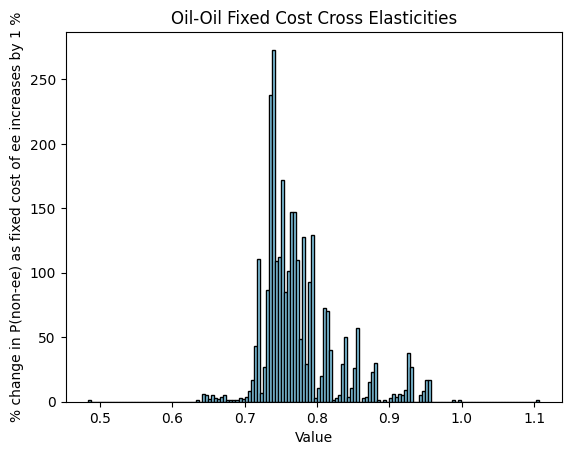

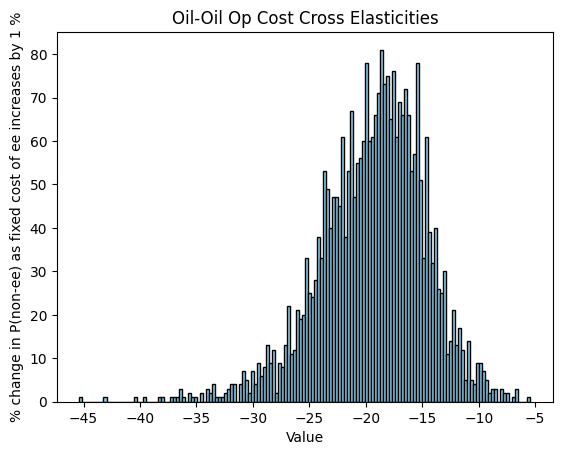

In [23]:
import matplotlib.pyplot as plt

## Direct Elasticities Fixed Cost Graph
# Create a histogram
plt.hist(direct_elast_fix_cost['elast_fix_oo'], bins=150, color="skyblue", edgecolor="black")

# Add labels and title
plt.xlabel("Value")
plt.ylabel("% change in P(non-ee) as fixed cost of ee increases by 1 %")
plt.title("Oil-Oil Fixed Cost Cross Elasticities")

# Show the plot
plt.show()

## Direct Elasticities Operating Cost Graph
# Create a histogram
plt.hist(direct_elast_op_cost['elast_op_oo'], bins=150, color="skyblue", edgecolor="black")

# Add labels and title
plt.xlabel("Value")
plt.ylabel("% change in P(non-ee) as fixed cost of ee increases by 1 %")
plt.title("Oil-Oil Op Cost Cross Elasticities")

# Show the plot
plt.show()


**Cross Elasticities of operational and fixed cost** for electricity-electricity alternatives

In [24]:
cross_elast_fixcost_ee = -1*beta_fix_cost*fix_cost_total['fix_cost_7']*prob_values['alt_ee']
cross_elast_opcost_ee = -1*beta_opt_cost*op_cost_total['op_cost_7']*prob_values['alt_ee']

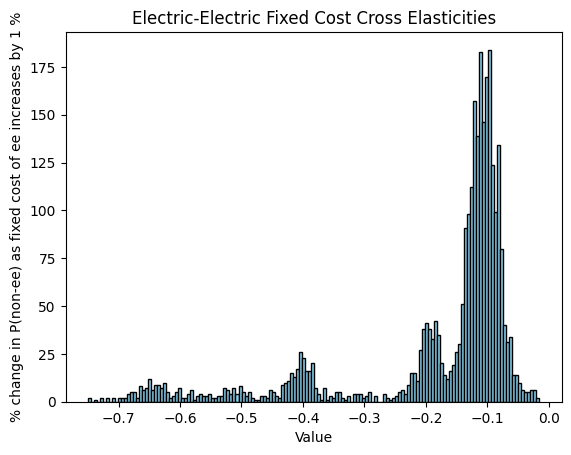

In [25]:
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(cross_elast_fixcost_ee, bins=150, color="skyblue", edgecolor="black")

# Add labels and title
plt.xlabel("Value")
plt.ylabel("% change in P(non-ee) as fixed cost of ee increases by 1 %")
plt.title("Electric-Electric Fixed Cost Cross Elasticities")

# Show the plot
plt.show()

# Predicted Market Share

### Original Market Share

In [26]:
#Restore original dataframe
df = df_backup.copy()
#update BIOGEME database
database = db.Database("Heating", df)

#computing the choice probabilities for each row in the database
simulate = {
    'alt_gg': models.logit(V, av, 1),  # P(choice=1)
    'alt_ge': models.logit(V, av, 2),  # P(choice=2)
    'alt_deo': models.logit(V, av, 3),  # P(choice=3)
    'alt_dee': models.logit(V, av, 4),  # P(choice=4)
    'alt_oo': models.logit(V, av, 5),  # P(choice=5)
    'alt_oe': models.logit(V, av, 6),  # P(choice=6)
    'alt_ee': models.logit(V, av, 7),  # P(choice=7)
    'alt_we': models.logit(V, av, 8),  # P(choice=8)
    'alt_wee': models.logit(V, av, 9),  # P(choice=9)
}


biosim = bio.BIOGEME(database, simulate)
prob_values = biosim.simulate(heating2.get_beta_values())
print("Predicted Market Share:")
for i in prob_values.mean():
    print(f'{i*100:.4f} %')


Predicted Market Share:
0.9320 %
0.3107 %
2.4853 %
6.9382 %
0.4142 %
0.6904 %
81.1529 %
4.2803 %
2.7960 %


### Case 1: Operating Cost for gas-gas alternatives decreases by 20%

In [27]:
#Restore original dataframe
df = df_backup.copy()
#Update the dataset: decrease operating cost of gas-gas alternatives by 20%
df['op_cost_1'] = df['op_cost_1'] * 0.8
#update BIOGEME database
database = db.Database("Heating", df)


#computing the choice probabilities for each row in the database
simulate = {
    'alt_gg': models.logit(V, av, 1),  # P(choice=1)
    'alt_ge': models.logit(V, av, 2),  # P(choice=2)
    'alt_deo': models.logit(V, av, 3),  # P(choice=3)
    'alt_dee': models.logit(V, av, 4),  # P(choice=4)
    'alt_oo': models.logit(V, av, 5),  # P(choice=5)
    'alt_oe': models.logit(V, av, 6),  # P(choice=6)
    'alt_ee': models.logit(V, av, 7),  # P(choice=7)
    'alt_we': models.logit(V, av, 8),  # P(choice=8)
    'alt_wee': models.logit(V, av, 9),  # P(choice=9)
}

biosim = bio.BIOGEME(database, simulate)
prob_values = biosim.simulate(heating2.get_beta_values())
print("Predicted Market Share after decreasing operating cost of gas-gas alternatives by 20%:")
for idx, i in enumerate(prob_values.mean()):
    print(f'{prob_values.mean().index[idx]} : {i*100:.4f} %')

Predicted Market Share after decreasing operating cost of gas-gas alternatives by 20%:
alt_gg : 5.0828 %
alt_ge : 0.1561 %
alt_deo : 2.4126 %
alt_dee : 6.7054 %
alt_oo : 0.4040 %
alt_oe : 0.6708 %
alt_ee : 77.8819 %
alt_we : 4.0138 %
alt_wee : 2.6727 %


### Case 2: Operating Cost for electric-electric alternatives increases by 10%

In [28]:
#Restore original dataframe
df = df_backup.copy()
#Update the dataset: increase operating cost of electric-electric alternatives by 10%
df['op_cost_7'] = df['op_cost_7'] * 1.1
#update BIOGEME database
database = db.Database("Heating", df)


#computing the choice probabilities for each row in the database
simulate = {
    'alt_gg': models.logit(V, av, 1),  # P(choice=1)
    'alt_ge': models.logit(V, av, 2),  # P(choice=2)
    'alt_deo': models.logit(V, av, 3),  # P(choice=3)
    'alt_dee': models.logit(V, av, 4),  # P(choice=4)
    'alt_oo': models.logit(V, av, 5),  # P(choice=5)
    'alt_oe': models.logit(V, av, 6),  # P(choice=6)
    'alt_ee': models.logit(V, av, 7),  # P(choice=7)
    'alt_we': models.logit(V, av, 8),  # P(choice=8)
    'alt_wee': models.logit(V, av, 9),  # P(choice=9)
}

biosim = bio.BIOGEME(database, simulate)
prob_values = biosim.simulate(heating2.get_beta_values())
print("Predicted Market Share after decreasing operating cost of gas-gas alternatives by 20%:")
for idx, i in enumerate(prob_values.mean()):
    print(f'{prob_values.mean().index[idx]} : {i*100:.4f} %')

Predicted Market Share after decreasing operating cost of gas-gas alternatives by 20%:
alt_gg : 1.9131 %
alt_ge : 0.6874 %
alt_deo : 6.1143 %
alt_dee : 14.5191 %
alt_oo : 1.0329 %
alt_oe : 1.7914 %
alt_ee : 54.4590 %
alt_we : 11.2862 %
alt_wee : 8.1966 %


Hausman-McFadden Test

1. Estimate model on full set of alternatives: $ \hat{\beta}_{\mathcal{C}}, \Sigma_{\hat{\beta}_{\mathcal{C}}} $
2. Estimate model on subset of alternatives: $\hat{\beta}_{\tilde{\mathcal{C}}}, \Sigma_{\hat{\beta}_{\tilde{\mathcal{C}}}}$
3. If coefficients differ ($\hat{\beta}_{\tilde{\mathcal{C}}} - \hat{\beta}_{\mathcal{C}}$) significantly: IIA fails


$$\text{HMFT} = \left(\hat{\beta}_{\tilde{\mathcal{C}}} - \hat{\beta}_{\mathcal{C}} \right)' \left( \Sigma_{\hat{\beta}_{\tilde{\mathcal{C}}}} - \Sigma_{\hat{\beta}_{\mathcal{C}}} \right)^{-1} \left( \hat{\beta}_{\tilde{\mathcal{C}}} - \hat{\beta}_{\mathcal{C}}\right) \sim \chi^2_{\tilde{K} = \left| \mathcal{C} \right| - | \tilde{\mathcal{C}} | }$$

HMFT $<$ critical $\chi^2_{\tilde{K}}$, IIA holds (i.e., coefficients do not differ significantly)

### Subset Model

In [39]:
#Restore original dataframe
df = df_backup.copy()
#subsetting data that excludes choice 9 (heat pump with electric boiler)
df = df[df['choice'] != 9]

database = db.Database("Heating", df)

obs = Variable("obs")
sector = Variable("sector")
hdd = Variable("hdd")
choice = Variable("choice")
conv_year = Variable("conv_year")
house_type = Variable("house_type")
constr_year = Variable("constr_year")
nb_rooms = Variable("nb_rooms")
nb_pers = Variable("nb_pers")
own_rent = Variable("own_rent")
surface = Variable("surface")
age = Variable("age")
income = Variable("income")
op_cost_1 = Variable("op_cost_1")
op_cost_2 = Variable("op_cost_2")
op_cost_3 = Variable("op_cost_3")
op_cost_4 = Variable("op_cost_4")
op_cost_5 = Variable("op_cost_5")
op_cost_6 = Variable("op_cost_6")
op_cost_7 = Variable("op_cost_7")
op_cost_8 = Variable("op_cost_8")
op_cost_9 = Variable("op_cost_9")
fix_cost_1 = Variable("fix_cost_1")
fix_cost_2 = Variable("fix_cost_2")
fix_cost_3 = Variable("fix_cost_3")
fix_cost_4 = Variable("fix_cost_4")
fix_cost_5 = Variable("fix_cost_5")
fix_cost_6 = Variable("fix_cost_6")
fix_cost_7 = Variable("fix_cost_7")
fix_cost_8 = Variable("fix_cost_8")
fix_cost_9 = Variable("fix_cost_9")
avail_1 = Variable("avail_1")
avail_2 = Variable("avail_2")
avail_3 = Variable("avail_3")
avail_4 = Variable("avail_4")
avail_5 = Variable("avail_5")
avail_6 = Variable("avail_6")
avail_7 = Variable("avail_7")
avail_8 = Variable("avail_8")
avail_9 = Variable("avail_9")
RowID = Variable("RowID")

In [40]:
# Define beta values to be estimated
## Beta('name', initial value, lower bound, upper bound, reference)
## Reference is used to set the reference alternative in a logit model (1 = yes, 0 = no)
asc_gg = Beta('asc_gg', 0, None, None, 1)
asc_ge = Beta('asc_ge', 0, None, None, 0)
asc_deo = Beta('asc_deo', 0, None, None, 0)
asc_dee = Beta('asc_dee', 0, None, None, 0)
asc_oo = Beta('asc_oo', 0, None, None, 0)
asc_oe = Beta('asc_oe', 0, None, None, 0)
asc_ee = Beta('asc_ee', 0, None, None, 0)
asc_we = Beta('asc_we', 0, None, None, 0)
#asc_wee = Beta('asc_wee', 0, None, None, 0)
b_opt_cost = Beta('b_opt_cost', 0, None, None, 0)
b_fix_cost = Beta('b_fix_cost', 0, None, None, 0)
b_income = Beta('b_income', 0, None, None, 0)
b_fix_cost_income = Beta('b_fix_cost_income', 0, None, None, 0)

# Utility functions

V_gg  = asc_gg  + b_opt_cost * op_cost_1 + b_fix_cost * fix_cost_1 + b_income * income + b_fix_cost_income * (fix_cost_1 / income)
V_ge  = asc_ge  + b_opt_cost * op_cost_2 + b_fix_cost * fix_cost_2 + b_income * income + b_fix_cost_income * (fix_cost_2 / income)
V_deo = asc_deo + b_opt_cost * op_cost_3 + b_fix_cost * fix_cost_3 + b_income * income + b_fix_cost_income * (fix_cost_3 / income)
V_dee = asc_dee + b_opt_cost * op_cost_4 + b_fix_cost * fix_cost_4 + b_income * income + b_fix_cost_income * (fix_cost_4 / income)
V_oo  = asc_oo  + b_opt_cost * op_cost_5 + b_fix_cost * fix_cost_5 + b_income * income + b_fix_cost_income * (fix_cost_5 / income)
V_oe  = asc_oe  + b_opt_cost * op_cost_6 + b_fix_cost * fix_cost_6 + b_income * income + b_fix_cost_income * (fix_cost_6 / income)
V_ee  = asc_ee  + b_opt_cost * op_cost_7 + b_fix_cost * fix_cost_7 + b_income * income + b_fix_cost_income * (fix_cost_7 / income)
V_we  = asc_we  + b_opt_cost * op_cost_8 + b_fix_cost * fix_cost_8 + b_income * income + b_fix_cost_income * (fix_cost_8 / income)
#V_wee = asc_wee + b_opt_cost * op_cost_9 + b_fix_cost * fix_cost_9 + b_income * income + b_fix_cost_income * (fix_cost_9 / income)

# Dictionary defining alternatives mapping
V = {1: V_gg, 2: V_ge, 3: V_deo, 4: V_dee, 5: V_oo, 6: V_oe, 7: V_ee, 8: V_we}#, 9: V_wee}

# Dictionary defining availability mapping
av = {1: avail_1, 2: avail_2,3: avail_3, 4: avail_4, 5: avail_5, 6: avail_6, 7: avail_7, 8: avail_8}#, 9: avail_9}

# Define the choice model
# loglogit(Alternatives mapping, Availability mapping, Choice variable)
logprob= models.loglogit(V, av, choice)

# Estimate Model
the_biogeme = bio.BIOGEME(database, logprob)
the_biogeme.model_name = 'heating2_sub' # Set the model name

#Calculate null Loglikelihood
the_biogeme.calculate_null_loglikelihood(av)

# Save the estimation results
heating2_sub = the_biogeme.estimate()

#Print the results
print(heating2_sub.short_summary())
heating2_sub.get_estimated_parameters()

Results for model heating2_sub
Nbr of parameters:		11
Sample size:			2816
Excluded data:			0
Null log likelihood:		-5198.642
Final log likelihood:		-1466.308
Likelihood ratio test (null):		7464.668
Rho square (null):			0.718
Rho bar square (null):			0.716
Akaike Information Criterion:	2954.615
Bayesian Information Criterion:	3019.989



/var/folders/g0/rncnm3l57mvd8n3r12bv0_br0000gn/T/ipykernel_10929/308233891.py:52: DeprecationWarning: get_estimated_parameters is deprecated. Use get_pandas_estimated_parameters(estimation_results=my_results) instead
  heating2_sub.get_estimated_parameters()


,Name,Value,Robust std err.,Robust t-stat.,Robust p-value
0,b_opt_cost,-1.033950e+01,4.796029e-01,-21.558454,0.000000e+00
1,b_fix_cost,8.236091e-01,2.859492e-01,2.880264,3.973426e-03
2,b_income,-7.119340e-13,4.930905e-16,-1443.820298,0.000000e+00
3,b_fix_cost_income,2.046060e-01,3.783896e-01,0.540728,5.886947e-01
4,asc_ge,-3.536361e-01,3.952341e-01,-0.894751,3.709202e-01
5,asc_deo,2.760390e+00,3.899703e-01,7.078463,1.457723e-12
6,asc_dee,2.797312e+00,3.323754e-01,8.416122,0.000000e+00
7,asc_oo,3.577507e+00,4.902023e-01,7.298023,2.919887e-13
8,asc_oe,3.666510e+00,4.612223e-01,7.949550,1.776357e-15
9,asc_ee,5.825929e+00,3.606907e-01,16.152146,0.000000e+00


### HMFT Test

In [ ]:
beta_original = heating2.get_beta_values()
beta_subset   = heating2_sub.get_beta_values()

In [50]:
heating2.get_variance_covariance_matrix("BHHH")

array([[ 1.15064001e-01, -2.75806921e-02,  5.04101625e-17,
         4.01552758e-04, -1.23351941e-02, -1.74808854e-02,
        -1.79338961e-02, -8.37771681e-02, -6.90621227e-02,
        -4.40831092e-02,  2.89609554e-02],
       [-2.75806921e-02,  7.55591418e-02,  3.26542729e-17,
        -6.85900490e-02,  1.99964681e-02, -1.14066884e-02,
         6.83901661e-03,  2.57983933e-02,  3.20173236e-02,
         4.59632674e-02,  1.65401531e-02],
       [ 1.01239107e-16, -2.47489824e-16, -1.98300799e-31,
         7.04657751e-16, -1.38890148e-16, -8.46548960e-17,
        -1.01847801e-16, -2.67617193e-16, -1.63415430e-16,
        -1.30795082e-16, -7.88614226e-17],
       [ 4.01552758e-04, -6.85900490e-02, -1.33049344e-16,
         2.69887738e-01, -1.40272394e-02, -1.23151863e-02,
        -1.44506451e-02, -3.14953072e-02, -1.93813990e-02,
        -5.88662736e-03, -1.49003294e-02],
       [-1.23351941e-02,  1.99964681e-02, -7.56422581e-17,
        -1.40272394e-02,  1.52314795e-01,  3.27109094e-02,
  